<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/master/Activities%5CActivity5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression with Two Input Variables

In [113]:
!wget -O Baseball.csv https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True

--2020-09-12 05:53:08--  https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv [following]
--2020-09-12 05:53:08--  https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv [following]
--2020-09-12 05:53:08--  https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response..

In [114]:
import pandas as pd
data = pd.read_csv('Baseball.csv', delimiter=',')
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [115]:
##Get the Runs Scored and the Runs Allowed
x_features = [ 'RS', 'RA']
y_output = ['W']

##Get the indices from the dataset
attribs = data.columns.to_list()
x_cols = [ attribs.index( v ) for v in x_features ]
y_cols = [ attribs.index( v ) for v in y_output ]

cols = x_cols + y_cols
print(cols)

[3, 4, 5]


In [116]:
import numpy as np
dataset = np.loadtxt('Baseball.csv', delimiter=',', usecols=tuple(cols), skiprows=1)

print(dataset.shape)
print(dataset[0:5])

(1232, 3)
[[734. 688.  81.]
 [700. 600.  94.]
 [712. 705.  93.]
 [734. 806.  69.]
 [613. 759.  61.]]


In [117]:
X = dataset[:,0:-1]
Y = dataset[:,-1]

In [118]:
import plotly.express as px

d = { x_features[0]: X[:,0], x_features[1]: X[:,1], y_output[0]: Y[:]}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df,
                    x=x_features[0],
                    y=x_features[1],
                    z=y_output[0],
                    opacity=0.4)

fig.show()

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 2, activation='linear'))
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(X, Y, epochs = 512, verbose = 0)

In [120]:
print('Model weights (w0, w1, and bias):')
w0 = model.layers[0].get_weights()[0][0]
w1 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(w1)
print(b0)

Model weights (w0, w1, and bias):
[0.16]
[-0.06]
[6.35]


Model Predictions

In [121]:
np.set_printoptions(precision = 2)
print ('True Validation Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[:5].T)

True Validation Data:
[81. 94. 93. 69. 61. 85. 97. 68. 64. 88.]
Prediction:
[[82.52 82.14 78.13 75.9  59.62]]


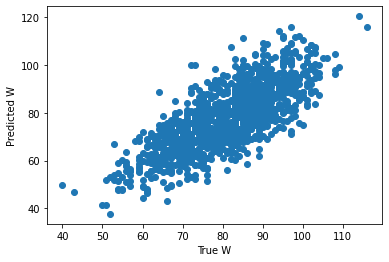

In [122]:
import matplotlib.pyplot as plt

plt.scatter(Y, prediction)
plt.ylabel('Predicted ' + y_output[0])
plt.xlabel('True ' + y_output[0])
plt.show()

The predictions for the wins seem reasonable as there is a linear trend between the predicted values and the True values.

##Linear Regression With Two Variables and Data Normalization

In [123]:
##Standardization
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 2, activation='linear'))
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(X, Y, epochs = 2048, verbose = 0)

In [125]:
print('Model weights (w0, w1, and bias):')
w0 = model.layers[0].get_weights()[0][0]
w1 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(w1)
print(b0)

Model weights (w0, w1, and bias):
[9.56]
[-9.73]
[79.64]


Model Predictions

In [126]:
np.set_printoptions(precision = 2)
print ('True Validation Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[:5].T)

True Validation Data:
[81. 94. 93. 69. 61. 85. 97. 68. 64. 88.]
Prediction:
[[84.45 90.1  80.37 72.11 64.38]]


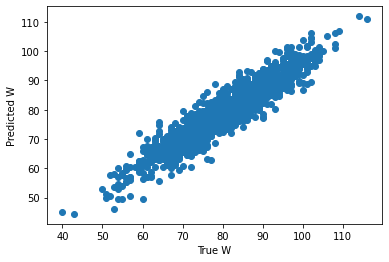

In [127]:
import matplotlib.pyplot as plt

plt.scatter(Y, prediction)
plt.ylabel('Predicted ' + y_output[0])
plt.xlabel('True ' + y_output[0])
plt.show()

A stronger linear relationship is observed between the predicted values and the true values when standardization is applied to each feature.  Less variance is observed with data standardization.  The model requires more epochs to converge to a suitable solution.